# First test of Optical Lever system

### Friday 7-Feb-2014

Today was the first test of the optical system.  A glass disk pendulum (roughly 70 grams) was hung  
on a 40 micron tungsten fiber and oscillated with a small amplitude of around 2 cm in the detector
plane.  
Since the focal length of the lens is around 1.0 m, this is a 10 mrad amplitude. 

Before proceeding, here is a smoothing function that I will use to within this notebook: 

In [1]:
def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
        
    example:

    t=linspace(-2,2,0.1)
    x=sin(t)+randn(len(t))*0.1
    y=smooth(x)
    
    see also: 
    
    numpy.hanning, numpy.hamming, numpy.bartlett, numpy.blackman, numpy.convolve
    scipy.signal.lfilter
 
    TODO: the window parameter could be the window itself if an array instead of a string
    NOTE: length(output) != length(input), to correct this: return y[(window_len/2-1):-(window_len/2)] instead of just y.
    """

    if x.ndim != 1:
        raise ValueError, "smooth only accepts 1 dimension arrays."

    if x.size < window_len:
        raise ValueError, "Input vector needs to be bigger than window size."


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'"


    s=numpy.r_[x[window_len-1:0:-1],x,x[-1:-window_len:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y


Here is the data from a 300 second run; shown are the L-R and T-B signals:

In [2]:
# read in the three data files
t   = np.loadtxt('timetest0568_07Feb2014.txt')
LR  = np.loadtxt('LR_filetest0568_07Feb2014.txt')
sumSignal = np.loadtxt('sumSignaltest0568_07Feb2014.txt')
LR_Smoothed = smooth(LR, window_len=30, window='hanning')[0:len(t)]
#
##  From the array of times, create a difference array
##  so we can see the variation in the sampling times
#
print len(t), len(LR), len(sumSignal), len(LR_Smoothed)
n=len(t)-1
dt = []

dt[0:n] = 1000*(t[1:n]- t[0:n-1]) # scale time differences to mS
np.delete(dt,0)

10327 10327 10327 10327


array([ 29.091,  29.378,  29.534, ...,  28.967,  28.51 ,  28.712])

10326 10327


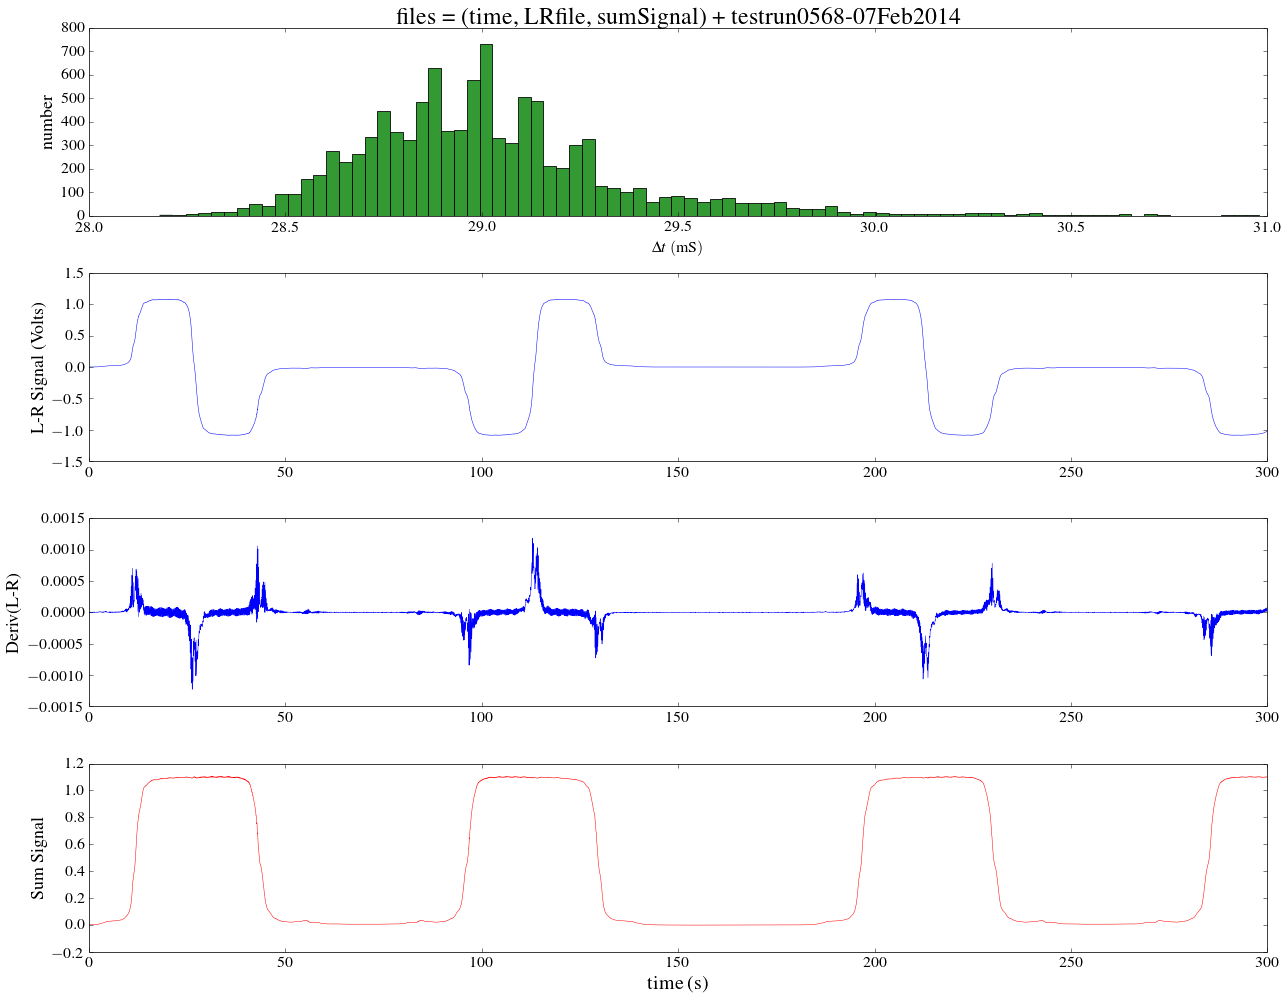

In [3]:
### %pylab qt  # uncomment to run plots interactively...works best in linux; issues on os X
fig = plt.figure(figsize(18,14))
plt.rc('text', usetex=True)

ax1 = fig.add_subplot(411)
ax2 = fig.add_subplot(412)
ax3 = fig.add_subplot(413)
ax4 = fig.add_subplot(414)

numBins = 400
ax1.hist(dt,numBins, color = 'green', alpha =0.8)
ax1.set_xlim([28,31])
ax1.set_ylabel('number', fontsize=18)
ax1.set_xlabel(r'\Delta t\;\mathrm{(mS)}', fontsize=16)
ax1.tick_params(axis='both', which='major', labelsize=16)

ax2.plot(t, LR)
ax2.set_ylabel('L-R Signal (Volts)', fontsize=18)
#ax2.set_xlabel('time (s)', fontsize = 18)
ax2.set_xlim([0,300])
ax2.tick_params(axis='both', which='major', labelsize=16)

m=len(t)

#LR_Deriv = (LR_Smoothed[1:m]- LR_Smoothed[0:m-1])/mean(dt)
LR_Deriv = (LR[1:m]- LR[0:m-1])/mean(dt)

print len(LR_Deriv), len(t)
tt = np.delete(t,0)
ax3.plot(tt,LR_Deriv)
ax3.set_ylabel('Deriv(L-R)', fontsize=18)
ax3.set_xlim([0,300])
ax3.tick_params(axis='both', which='major', labelsize=16)

ax4.plot(t, sumSignal, color = 'red')
ax4.set_ylabel('Sum Signal', fontsize=18)
ax4.set_xlabel('time (s)', fontsize=20)
ax4.set_xlim([0,300])
#ax4.set_ylim([1.08,1.11])
#plt.show()
ax4.tick_params(axis='both', which='major', labelsize=16)

ax1.set_title('files = (time, LRfile, sumSignal) + testrun0568-07Feb2014', fontsize=24)
plt.tight_layout()
plt.savefig('RunSummary0568_07Feb2014.pdf', dpi=600, 
        orientation='landscape', format='pdf',
        transparent=False, bbox_inches=None, pad_inches=0.1,
        frameon=None)

 28,
 31]

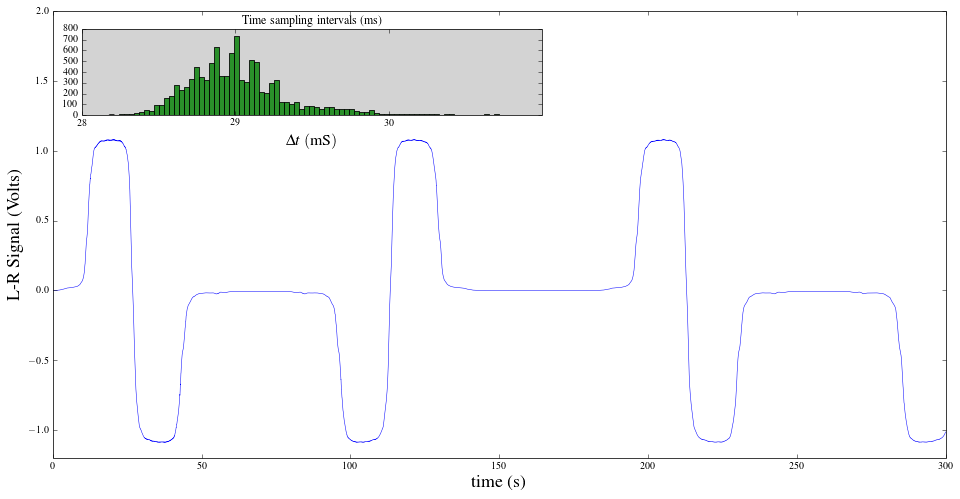

In [4]:
fig = plt.figure(figsize(16,8))
plt.rc('text', usetex=True)
plot(t, LR)
ylabel('L-R Signal (Volts)', fontsize=18)
xlabel('time (s)', fontsize = 18)
xlim([0,300])
ylim([-1.2,2.0])

a = axes([.15, .72, .4, .15], axisbg='lightGray')
hist(dt,numBins, color = 'green', alpha =0.8)
title('Time sampling intervals (ms)')
xlabel( r'\Delta t\;\mathrm{(mS)}', fontsize=16 )
setp(a, xticks=[28,29,30], xlim=[28,31] )

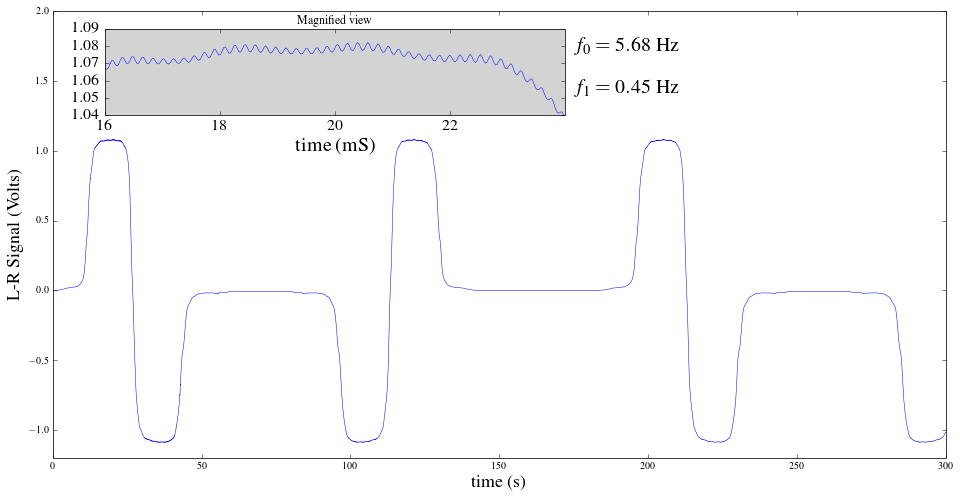

In [15]:
fig = plt.figure(figsize(16,8))
plt.rc('text', usetex=True)
plot(t, LR)
ylabel('L-R Signal (Volts)', fontsize=18)
xlabel('time (s)', fontsize = 18)
xlim([0,300])
ylim([-1.2,2.0])
text(175,1.7, r'$f_0 = 5.68$ Hz', fontsize=20)
text(175, 1.4, r'$f_1 = 0.45$ Hz', fontsize=20)


a = axes([.17, .72, .4, .15], axisbg='lightGray')
plot(t,LR)
title('Magnified view')
xlabel( r'\mathrm{time (mS)}', fontsize=20 )
a.tick_params(axis='both', which='major', labelsize=16)
setp(a, xticks=[16, 18,20,22], xlim=[16,24], ylim=[1.04,1.09] )
show()

In [12]:
%pylab qt 
#subsetSum = sumSignal[30/0.03: 35/0.03]
sumSignal_smoothed = smooth(sumSignal, window_len=30, window='hanning')
len(t), len(sumSignal), len(sumSignal_smoothed)
plot(t,sumSignal)
plot(t, sumSignal_smoothed[0:len(t)])
show()

Populating the interactive namespace from numpy and matplotlib


In [5]:
 1/2.22

0.4504504504504504